In [23]:
# Importando bibliotecas que vão ser utilizadadas para a visualização dos dados para analisar a composição e correlação entre eles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt
# %matplotlib inline

In [24]:
# Lendo o arquivo tratado e reduzido anteriormente
database = pd.read_csv('DATABASE/base-reduzida-v4.csv', sep=',', encoding='utf-8', index_col=0)

In [25]:
df = database

In [26]:
# Visualizando o cabeçalho e alguns dados do dicionário
df.head()

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Aviso bebida últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo,Alcoolismo e Depressão
351,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0
864,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0
988,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1079,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1190,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [27]:
# Verificando a quantidade de linhas e colunas do arquivo
df.shape

(1614, 16)

In [28]:
# Verificando como é a correlação das colunas do dataframe através de um heatmap
def Heatmap(df):
    fig, ax = plt.subplots(figsize=(10, 8))  # Defina o tamanho da figura conforme necessário

    sns.heatmap(
        df.corr(),
        vmin=-1,
        vmax=+1,
        annot=False,
        cmap='YlGnBu',
        linewidths=0,
        ax=ax,
        linewidth=.5
    )

   # grafico.set_title(
   #    "Heatmap da Correlação das variáveis do Dataset",
   #    fontsize = 12,
   #    fontname = "serif",
   #    horizontalalignment = 'center'
   # )




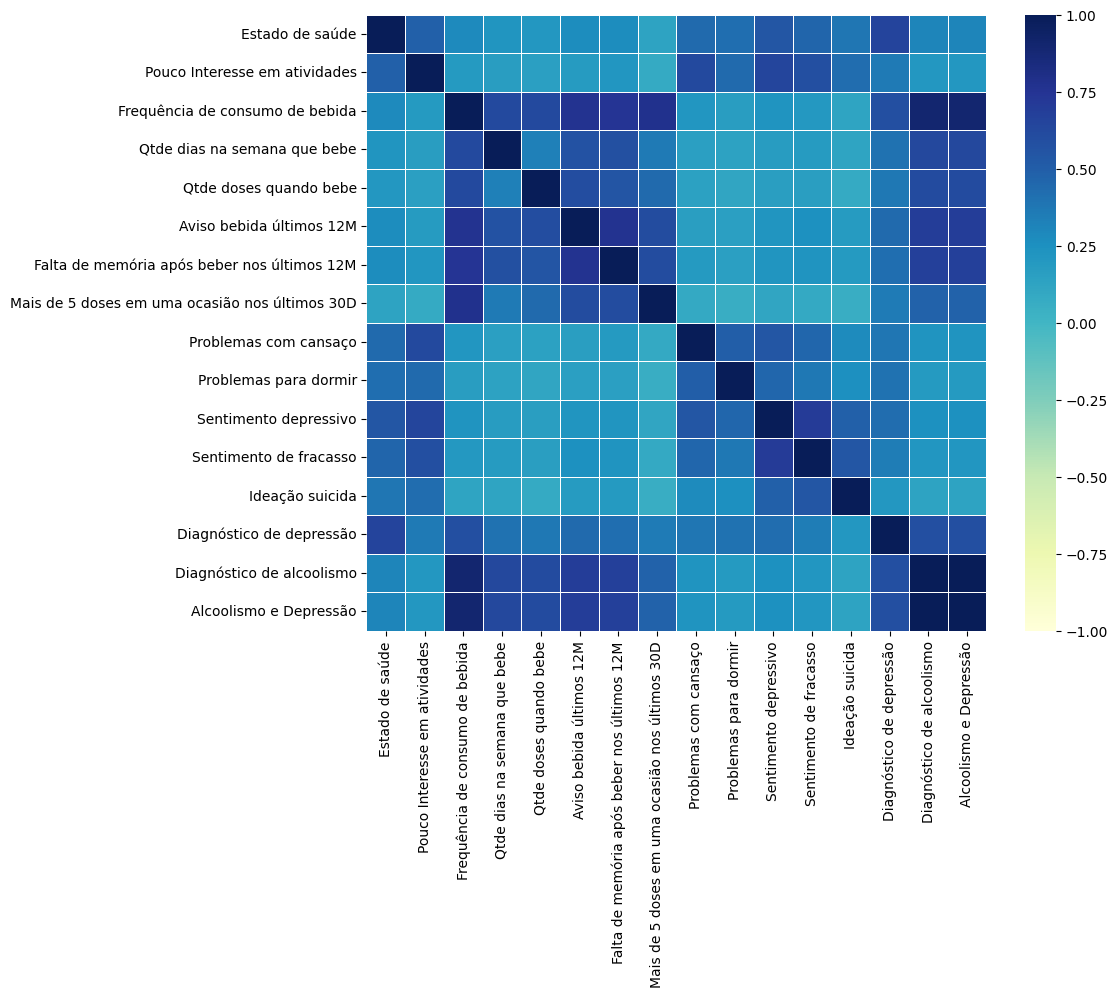

In [29]:
Heatmap(df)

(-1.098712413328153,
 1.1329248725903585,
 -1.095948051181601,
 1.2036378235756142)

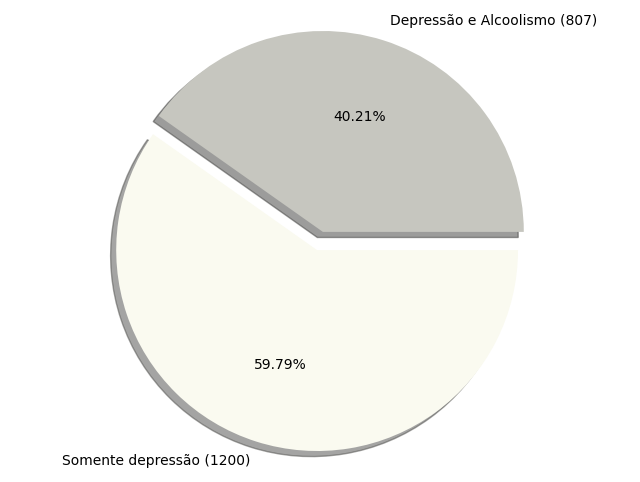

In [30]:
# Plotando um gráfico de pizza para analizar a proporção de Alcóolismo e depressão vs somente depressão
condicao_depressao = df['Diagnóstico de depressão'] == 1.0
df_so_depressao = df.loc[condicao_depressao]
a = df["Alcoolismo e Depressão"] == 1.0
depressao_e_alcoolismo = df.loc[a] 



QtdeD = len(df_so_depressao)
QtdeDeA = len(depressao_e_alcoolismo)

# Criar um rótulo para o gráfico de pizza
rotulo = [f'Depressão e Alcoolismo ({QtdeDeA})', f'Somente depressão ({QtdeD})']

# Valores para o gráfico de pizza
valores = [QtdeDeA, QtdeD]

# Cores para as fatias do gráfico
cores = ["#C6C6BF", "#FAFAF0"]

# Explodir a primeira fatia (Dados A)
explode = (0.104, -0.009)

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=rotulo, colors=cores, explode=explode, autopct='%1.2f%%', shadow=True)
# plt.title('Proporção de Depressão em relação à depressão e alcoolismo')
plt.axis('equal')  # Para garantir que o gráfico seja uma circunferência

In [31]:
# Todos os outliers da base
def Outlier(df):
   
   sns.boxplot(
      data = df,
      orient =  "h",
      showcaps = False,
      notch = True,
      flierprops = {"marker": "."},
      boxprops = {
         "facecolor": (.4, .6, .8, .5)
      },
      medianprops = {
         "color": "coral"
      }
   )

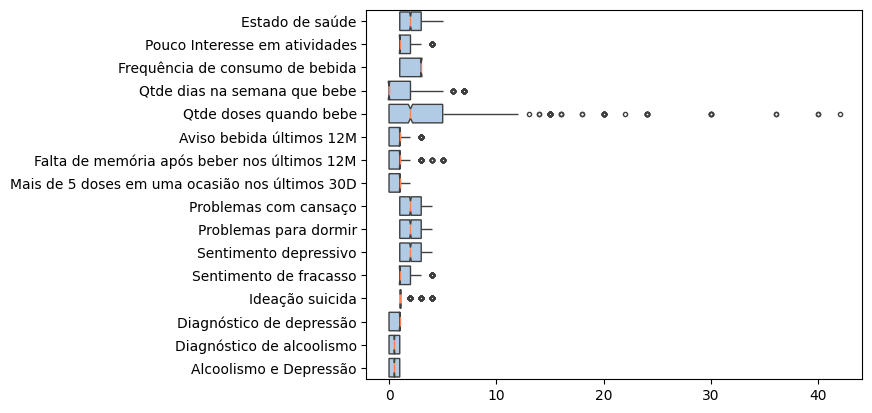

In [32]:
Outlier(df)

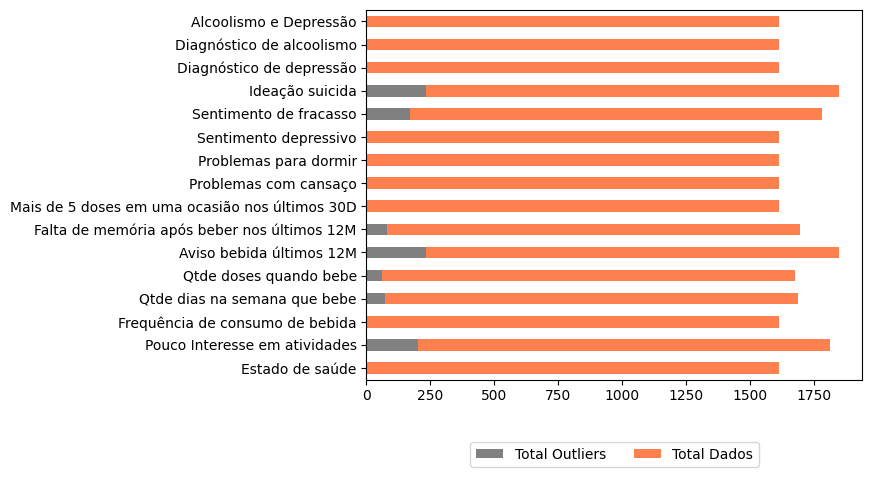

In [33]:
# Função para calcular outliers
def calcular_outliers(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = coluna[(coluna < limite_inferior) | (coluna > limite_superior)]
    return len(outliers)

# Calcular o total de outliers para cada coluna
total_outliers_por_coluna = df.apply(calcular_outliers)

# Calcular o total de dados para cada coluna
total_dados_por_coluna = len(df)

# Defina a ordem das colunas conforme o DataFrame original
ordem_das_colunas = df.columns

# Defina a cor "Coral" e a cor "Cinza"
cor_coral = (1.0, 0.5, 0.31)  # RGB para Coral
cor_cinza = 'gray'

# Inverta a ordem das cores no gráfico de barras
cores = [cor_cinza, cor_coral]

# Crie um DataFrame para os totais
dados_totais = pd.DataFrame({'Coluna': ordem_das_colunas, 'Total Outliers': total_outliers_por_coluna.values, 'Total Dados': total_dados_por_coluna})

# Plote o gráfico de barras horizontais com as cores invertidas
ax = dados_totais.set_index('Coluna').plot(kind='barh', stacked=True, color=cores)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.ylabel('')
plt.xlabel('')
# plt.title('Quantidade de Outliers vs. Total de Dados por Coluna')
plt.show()